# Figure 3 - effects of warming on  home runs
#### Christopher Callahan
#### Christopher.W.Callahan.GR@dartmouth.edu

#### Mechanics
Dependencies

In [1]:
import numpy as np
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import patches
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
import seaborn as sns
from scipy import stats
import xarray as xr

Data location

In [52]:
loc_panel = "../Data/Panel/"
loc_reg = "../Data/RegressionResults/"
loc_projections = "../Data/HRProjections/"
loc_attribution = "../Data/HRAttribution/"
loc_parkinfo = "../Data/"
loc_summary_data = "../Data/SummaryData/"

Years

In [3]:
y1 = 2020
y2 = 2100
y1_panel = 1954
y2_panel = 2019
y1_clm = 2000
y2_clm = 2019

#### Analysis

panel data

In [4]:
y1 = 1954
y2 = 2019
y1_final = 1962
data = pd.read_csv(loc_panel+"baseball_climate_data_"+str(y1)+"-"+str(y2)+".csv")
data["tx"] = data.tmax_hadisd
data["tx2"] = (data.tx)**2
data["total_hr"] = data.visitor_hr + data.home_hr
data = data.loc[data.year.values>=y1_final,:]

Climatology

In [5]:
data_clm = data.loc[(data.year>=y1_clm)&(data.year<=y2_clm),["year","total_hr"]]
hr_baseline = data_clm.groupby("year").sum().reset_index().total_hr.mean()

Read historical attribution

In [6]:
hr_attr_ds = xr.open_dataset(loc_attribution+"CMIP6_historical-natural_homeruns_1962-2019.nc")
hr_attr = hr_attr_ds.hr_difference

In [7]:
attr_mean = hr_attr.sum(dim="park").mean(dim="uncertainty")
attr_sd = hr_attr.sum(dim="park").std(dim="uncertainty")

In [8]:
attr_mean

<xarray.DataArray 'hr_difference' (year: 58)>
array([-30.842138  , -39.19191168, -41.93959561, -29.99511817,
       -41.93104067, -16.49281378, -29.15300831, -45.79243713,
       -48.05660206, -48.93528294, -54.28511876, -41.67415287,
       -51.81199534, -34.90994944, -22.78416217, -33.87326053,
       -36.63865777, -29.78023384, -28.91452353, -22.86319074,
       -32.99694606,  -9.98772954, -13.9886784 , -18.26516808,
       -26.57419413, -24.9868766 , -17.15686869,  -4.71382865,
        -3.0560355 ,  -9.3116535 , -18.05245535,  -2.64483755,
        -1.44836031,  -3.88954263,   5.46889058,  16.46092473,
        -2.80971388,  14.35030143,   8.91284853,  23.25384316,
        22.27787358,  17.4222127 ,  21.62023384,  26.54899927,
        31.87652037,  36.07996579,  24.28928049,  42.06134771,
        47.69172248,  59.21213613,  53.49856607,  46.19313714,
        45.03309627,  58.58571113,  66.79701035,  56.19021408,
        88.0299562 ,  55.57160984])
Coordinates:
  * year     (year) int64 1962 1963 1964 1965 1966 ... 2015 2016 2017 2018 2019

In [9]:
attr_mean[attr_mean>0]

<xarray.DataArray 'hr_difference' (year: 23)>
array([ 5.46889058, 16.46092473, 14.35030143,  8.91284853, 23.25384316,
       22.27787358, 17.4222127 , 21.62023384, 26.54899927, 31.87652037,
       36.07996579, 24.28928049, 42.06134771, 47.69172248, 59.21213613,
       53.49856607, 46.19313714, 45.03309627, 58.58571113, 66.79701035,
       56.19021408, 88.0299562 , 55.57160984])
Coordinates:
  * year     (year) int64 1996 1997 1999 2000 2001 ... 2015 2016 2017 2018 2019

In [10]:
hr_attr_baseline = hr_attr.loc[:,2000:2019,:].mean(dim=["year","uncertainty"])

In [11]:
attr_sum_mean = hr_attr.sum(dim="park").loc[2010:2019].sum(dim="year").mean(dim="uncertainty")
attr_sum_sd = hr_attr.sum(dim="park").loc[2010:2019].sum(dim="year").std(dim="uncertainty")

In [12]:
print(attr_mean.loc[2010:2019].mean())
print(attr_mean.loc[2010:2019].mean() - hr_attr.sum(dim="park").loc[2010:2019].mean(dim="year").std(dim="uncertainty"))
print(attr_mean.loc[2010:2019].mean() + hr_attr.sum(dim="park").loc[2010:2019].mean(dim="year").std(dim="uncertainty"))
#print(attr_mean.loc[2010:2019].mean() - attr_sd.loc[2010:2019].mean())
#print(attr_mean.loc[2010:2019].mean() + attr_sd.loc[2010:2019].mean())

<xarray.DataArray 'hr_difference' ()>
array(57.68031597)
<xarray.DataArray 'hr_difference' ()>
array(19.50620077)
<xarray.DataArray 'hr_difference' ()>
array(95.85443117)


In [13]:
print(attr_sum_mean)
print(attr_sum_mean - attr_sum_sd)
print(attr_sum_mean + attr_sum_sd)

<xarray.DataArray 'hr_difference' ()>
array(576.8031597)
<xarray.DataArray 'hr_difference' ()>
array(195.0620077)
<xarray.DataArray 'hr_difference' ()>
array(958.5443117)


Other experiments

In [14]:
experiments = ["ssp126","ssp245","ssp370","ssp585"]
exp_names = ["SSP1-2.6","SSP2-4.5","SSP3-7.0","SSP5-8.5"]
exp_colors = np.array([[0,153,136],[0,119,187],[238,119,51],[204,51,17]])/255.

Read data from other experiments

In [15]:
all_exp_files = np.array([loc_projections+x for x in sorted(os.listdir(loc_projections)) if ("daynight-dome-hist_" in x)])
all_exp_proj =  xr.open_mfdataset(all_exp_files,combine="nested",concat_dim="scenario")
all_exp_proj.coords["scenario"] = experiments
all_exp_hr = all_exp_proj.hr_difference + hr_attr_baseline.loc[all_exp_proj.park.values]
all_exp_gmst = all_exp_proj.gmst_anom

all_exp_night_files = np.array([loc_projections+x for x in sorted(os.listdir(loc_projections)) if ("daynight-dome-allnight_" in x)])
all_exp_night_proj =  xr.open_mfdataset(all_exp_night_files,combine="nested",concat_dim="scenario")
all_exp_hr_night = all_exp_night_proj.hr_difference + hr_attr_baseline.loc[all_exp_night_proj.park.values]

Domes

In [16]:
dome_codes = ["ARL02","HOU02","HOU03","MIA02","MIL06","SEA02","STP01","TOR02","PHO01","SEA03","MIN03","MON02"]

In [17]:
[print(x) for x in all_exp_proj.park.values if x in dome_codes]

ARL02
HOU03
MIA02
MIL06
PHO01
SEA03
STP01
TOR02


[None, None, None, None, None, None, None, None]

GMST decadal intervals

In [18]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning,message="'base' in .resample")

In [19]:
all_exp_hr.coords["decade"] = ((all_exp_hr.year/10).astype(int))*10
all_exp_gmst.coords["decade"] = ((all_exp_gmst.year/10).astype(int))*10
all_exp_hr_decadal = all_exp_hr.sum(dim="park").groupby("decade").mean(dim="year")
all_exp_gmst_decadal = all_exp_gmst.groupby("decade").mean(dim="year")

all_exp_hr_night.coords["decade"] = ((all_exp_hr_night.year/10).astype(int))*10
all_exp_hr_night_decadal = all_exp_hr_night.sum(dim="park").groupby("decade").mean(dim="year")

Difference in HR between warming levels

In [20]:
gwls = [1.5,2,3,4]
gwl_cols = np.array([[254,218,139],[253,179,102],[246,126,75],[221,61,45]])/255.
cumulative_hr_gwl = np.full((len(gwls),len(experiments),len(all_exp_hr.uncertainty.values)),np.nan)
hr_gwl_park = np.full((len(gwls),len(all_exp_hr.park.values)),np.nan)
for e in np.arange(0,len(experiments),1):
    print(experiments[e])
    for i in np.arange(0,len(all_exp_hr.uncertainty.values),1):
        hr_ei = all_exp_hr[e,:,:,i].sum(dim="park").load() 
        gmst_ei = all_exp_proj.gmst_anom_smoothed[e,:,i].load()
        for g in np.arange(0,len(gwls),1):
            gwl = gwls[g]
            if (len(gmst_ei[gmst_ei<gwl])>0)&(len(gmst_ei[gmst_ei>gwl])>0):
                cumulative_hr_gwl[g,e,i] = hr_ei[gmst_ei<=gwl].sum().values

ssp126
ssp245
ssp370
ssp585


In [21]:
all_exp_hr_flat = all_exp_hr.stack(uncert=("scenario","uncertainty"))
all_exp_gmst_flat = all_exp_gmst.stack(uncert=("scenario","uncertainty"))

By park

In [22]:
hr_gwl_park = np.full((len(gwls),len(all_exp_hr.park.values),len(all_exp_hr_flat.uncert.values)),np.nan)
for i in np.arange(0,len(all_exp_hr_flat.uncert.values),1):
    if np.mod(i,100)==0:
        print(i)
    for g in np.arange(0,len(gwls),1):
        gwl = gwls[g]
        gmst_i = all_exp_gmst_flat[:,i].values
        hr_i = all_exp_hr_flat[:,:,i].values
        if (len(gmst_i[gmst_i<gwl])>0)&(len(gmst_i[gmst_i>gwl])>0):
            yr_ind = np.argmin(np.abs(gmst_i-gwl))
            hr_gwl_park[g,:,i] = hr_i[:,yr_ind]

0
100
200
300
400
500
600
700
800
900


In [23]:
hr_gwl_park_mean = np.nanmean(hr_gwl_park,axis=2)

Park names

In [24]:
parkinfo = pd.read_csv(loc_parkinfo+"ParkLocations.csv")

In [25]:
parknames = []
domes = np.zeros(len(all_exp_hr.park.values))
for i in np.arange(0,len(all_exp_hr.park.values),1):
    park_id = all_exp_hr.park.values[i]
    if park_id in dome_codes:
        domes[i] = 1.0
    park_name = parkinfo.loc[parkinfo.PARKID==park_id,"NAME"].values[0]
    if park_name=="Angel Stadium of Anaheim":
        parknames.append("Angel Stadium")
    elif park_name=="Oriole Park at Camden Yards":
        parknames.append("Camden Yards")
    elif park_name=="U.S. Cellular Field":
        parknames.append("Guaranteed Rate Field")
    elif park_name=="Yankee Stadium II":
        parknames.append("Yankee Stadium")
    elif park_name=="Oakland-Alameda County Coliseum":
        parknames.append("RingCentral Coliseum")
    elif park_name=="Busch Stadium III":
        parknames.append("Busch Stadium")
    elif park_name=="Globe Life Park":
        parknames.append("Globe Life Field")
    elif park_name=="SunTrust Park":
        parknames.append("Truist Park")
    elif park_name=="Marlins Park":
        parknames.append("LoanDepot Park")
    elif park_name=="Miller Park":
        parknames.append("American Family Field")
    elif park_name=="Safeco Field":
        parknames.append("T-Mobile Park")
    elif park_name=="AT&T Park":
        parknames.append("Oracle Park")
    else:
        parknames.append(park_name)


Multiple experiments and historical attribution on one big plot

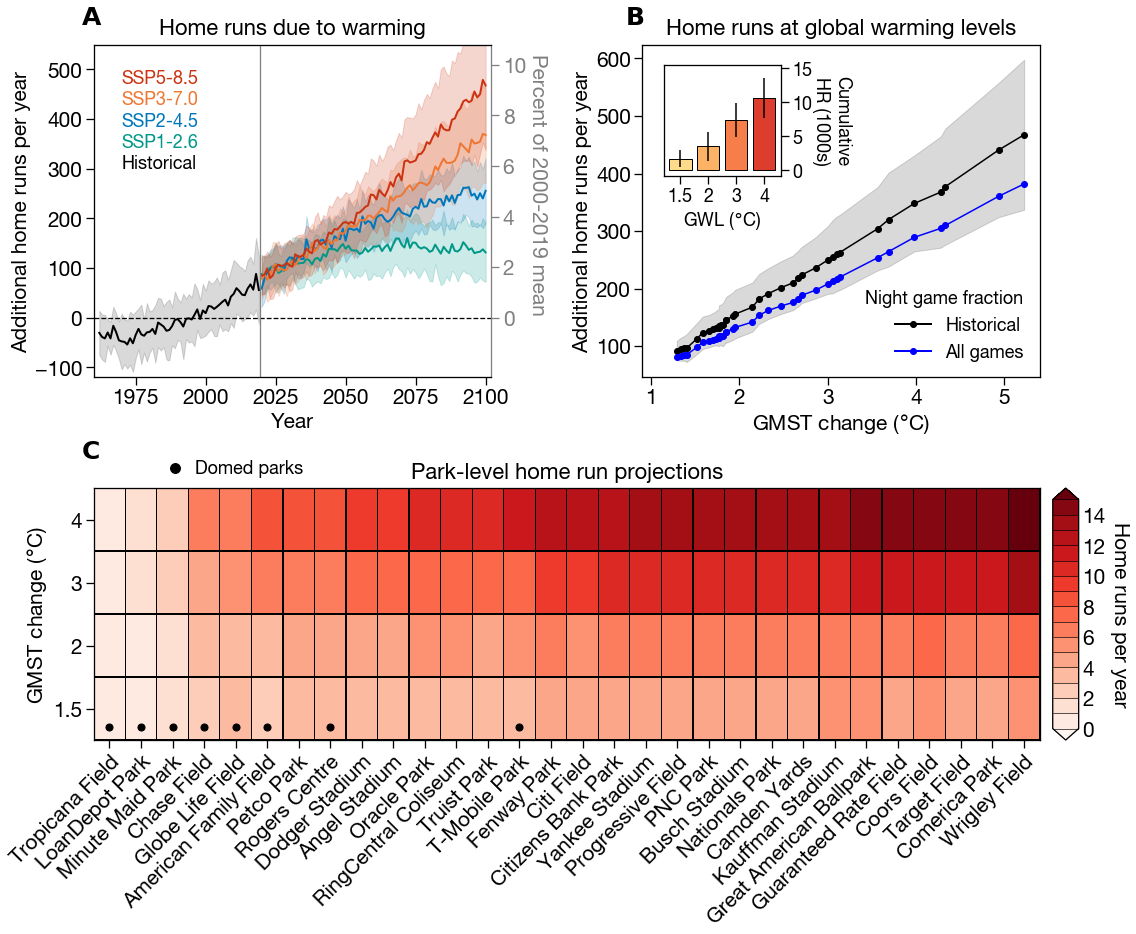

In [27]:
fig = plt.figure(figsize=(18,14))
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Helvetica Neue"]
rcParams["font.size"] = 21.0
rcParams["axes.linewidth"] = 1.3
rcParams["xtick.major.size"] = 8
rcParams["xtick.major.width"] = 1.3
rcParams["ytick.major.size"] = 8
rcParams["ytick.major.width"] = 1.3

gs1 = gridspec.GridSpec(1,2)
gs1.update(left=0.15,right=0.88,top=0.9,bottom=0.57,wspace=0.38,hspace=0.6)

tfs = 22

ax = plt.subplot(gs1[0,0])
ax.spines['right'].set_color('gray')

## historical

plt.plot(attr_mean.year.values,attr_mean.values,color="black",
        linewidth=2,zorder=3)
ax.fill_between(attr_mean.year.values,attr_mean-attr_sd,attr_mean+attr_sd,
                color="black",alpha=0.15,zorder=2)

plt.axhline(y=0,color="black",linestyle="--",linewidth=1.3,zorder=1)
plt.title("Home runs due to warming",fontsize=tfs,pad=10)
plt.ylabel("Additional home runs per year")
plt.xlabel("Year")

xtxt = 1970
ytxt = 300
plt.text(xtxt,ytxt,"Historical",fontsize=18)

## future
for e in np.arange(0,len(experiments),1):
    col = exp_colors[e,:]
    yrs = all_exp_hr.year.values
    ens_mean = all_exp_hr.sel(scenario=experiments[e]).sum(dim="park").mean(dim="uncertainty")
    ens_std = all_exp_hr.sel(scenario=experiments[e]).sum(dim="park").std(dim="uncertainty")

    plt.plot(yrs,ens_mean,color=col,linewidth=2)
    ax.fill_between(yrs,ens_mean-ens_std,
                    ens_mean+ens_std,color=col,alpha=0.2)

    plt.text(xtxt,ytxt+(43*(e+1)),exp_names[e],fontsize=18,
            color=col)
    
yticks = np.arange(-100,500+100,100)
#plt.yticks(yticks)
yl1 = -120
yl2 = 550
plt.ylim([yl1,yl2])
xl1 = 1960
xl2 = 2102
plt.xlim([xl1,xl2])

plt.axvline(x=2019.5,linewidth=1.3,color="gray",linestyle="-")

## percent of 2000-2019 mean
ax2 = ax.twinx()
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
#ax2.yaxis.set_tick_params(width=1.3)

ax2.yaxis.label.set_color('gray')
ax2.tick_params(axis='y', colors='gray')
ax2.spines['right'].set_color('gray')
yl1_pct = 100*yl1/hr_baseline
yl2_pct = 100*yl2/hr_baseline
#ax2ticks = [100*x/hr_baseline for x in yticks if x>=0]

ax2.set_ylim([yl1_pct,yl2_pct])
#ax2.set_yticks(ax2ticks)
ax2.set_yticks([0,2,4,6,8,10])
ax2.set_ylabel("Percent of "+str(y1_clm)+"-"+str(y2_clm)+" mean",
              rotation=270,labelpad=25)
ax2.yaxis.set_label_coords(1.14,0.58)


## gmst change
ax = plt.subplot(gs1[0,1])

x = np.sort(all_exp_gmst_decadal.mean(dim="uncertainty").values.flatten())
y_mean = np.sort(all_exp_hr_decadal.mean(dim="uncertainty").values.flatten())
plt.plot(x,y_mean,color="black",linestyle="-",marker="o",
        label="Historical")
y_std = np.sort(all_exp_hr_decadal.std(dim="uncertainty").values.flatten())
ax.fill_between(x,y_mean-y_std,y_mean+y_std,color="black",alpha=0.15)

# now if you shift to night games
y_mean2 = np.sort(all_exp_hr_night_decadal.mean(dim="uncertainty").values.flatten())
plt.plot(x,y_mean2,color="blue",linestyle="-",marker="o",label="All games")

plt.xlim([0.9,5.4])
plt.ylabel("Additional home runs per year")
plt.xlabel("GMST change ($\degree$C)")

plt.title("Home runs at global warming levels",fontsize=tfs,pad=10)

lfs = 18
leg = plt.legend(loc="lower right",fontsize=lfs,frameon=False,
                title="Night game fraction")
for legobj in leg.legendHandles:
    legobj.set_linewidth(2)
leg.get_title().set_fontsize(str(lfs))
leg._legend_box.align = "right"


## inset for levels
inset_ax = fig.add_axes([0.59,0.77,0.09,0.11])
#inset_ax.set_title("Cumulative HR,fontsize=18)

for g in np.arange(0,len(gwls),1):
    hr_gwl = cumulative_hr_gwl[g,:,:].flatten()
    hr_gwl_mean = np.nanmean(hr_gwl)/1000.
    hr_gwl_std = np.nanstd(hr_gwl)/1000.
    plt.bar(x=g,height=hr_gwl_mean,facecolor=gwl_cols[g,:],edgecolor="black",
           yerr=hr_gwl_std)
    
inset_ax.set_ylim([-0.8,15.5])
inset_ax.set_xticks([0,1,2,3])
inset_ax.set_xticklabels([str(x) for x in gwls],fontsize=18)
inset_ax.set_yticks([0,5,10,15])
inset_ax.set_yticklabels(["0","5","10","15"],fontsize=18)
inset_ax.set_ylabel("Cumulative"+"\n"+"HR (1000s)",fontsize=18,rotation=270)
inset_ax.yaxis.tick_right()
inset_ax.yaxis.set_label_coords(1.27,0.5)
inset_ax.set_xlabel("GWL ($\degree$C)",fontsize=18)
#inset_ax.set_xticklabels(fontsize=18)
#inset_ax.set_yticklabels(fontsize=18)




gs2 = gridspec.GridSpec(1,1)
gs2.update(left=0.15,right=0.88,top=0.46,bottom=0.21,wspace=0.38,hspace=0.6)

tfs = 22

ax = plt.subplot(gs2[0,0])

vmin = 0
vmax = 15
ncol = 16
bounds = np.linspace(vmin,vmax,ncol)
cols = plt.get_cmap("Reds")(np.linspace(0,1,len(bounds)+1))
cmap = colors.ListedColormap(cols[1:-1])
cmap.set_over(cols[-1])
cmap.set_under(cols[0])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=len(bounds)-1)
cbar = plt.cm.ScalarMappable(norm=norm,cmap=cmap)


sortind = np.argsort(hr_gwl_park_mean[-1,:]) #[::-1]
sax = sns.heatmap(hr_gwl_park_mean[::-1,sortind],cbar=False,
            vmin=vmin,vmax=vmax,cmap=cmap,norm=norm,
           linewidths=0.25,linecolor="black")
for _, spine in sax.spines.items():
    spine.set_visible(True)

domes_sorted = domes[sortind]
    
plt.yticks(ticks=[3.5,2.5,1.5,0.5],labels=[str(x) for x in gwls],
          rotation=0)
plt.ylabel("GMST change ($\degree$C)")

x_c = np.arange(0.5,29.5+1,1)
plt.xticks(ticks=x_c,labels=np.array(parknames)[sortind],
           rotation=45,ha="right",rotation_mode="anchor")

plt.title("Park-level home run projections",fontsize=tfs,pad=10)

# dots for domed parks
x_domes = x_c[domes_sorted.astype(bool)]
plt.scatter(x_domes,[3.8]*len(x_domes),s=50,color="black",
           label="Domed parks")

plt.legend(loc="upper left",fontsize=18,
           bbox_to_anchor=(0.05,1.18,0,0),
          frameon=False,fancybox=False,framealpha=1,
          handletextpad=0.1,edgecolor="black",
          markerscale=1.4)

#plt.plot([0,8],[-0.1,-0.1],linewidth=2,color="black",clip_on=False)
#plt.figtext(0.206,0.473,"Domed parks",fontsize=18)

# colorbar
cbar_ax = fig.add_axes([0.89,0.21,0.02,0.25])
plt.setp(cbar_ax.spines.values(), linewidth=0.3)
cb = fig.colorbar(cbar,cax=cbar_ax,orientation="vertical",
                  drawedges=True,extend="both")
cbar_ax.tick_params(direction="in",width=0.05)
cb.set_label(label="Home runs per year",rotation=270,
            labelpad=24)


plt.figtext(0.14,0.92,r'$\bf{A}$',fontsize=25)
plt.figtext(0.56,0.92,r'$\bf{B}$',fontsize=25)
plt.figtext(0.14,0.49,r'$\bf{C}$',fontsize=25)


plt.savefig("../Figures/Fig3.pdf")
plt.show()

In [28]:
x1,x2 = all_exp_hr.sel(scenario="ssp585").sum(dim="park").mean(dim="uncertainty").load().loc[[2050,2100]].values
print(x1)
print(x2)

192.35914552338235
467.45328168233146


In [29]:
x11,x21 = all_exp_hr.sel(scenario="ssp126").sum(dim="park").mean(dim="uncertainty").load().loc[[2050,2100]].values
print(x11)
print(x21)

138.44128239266615
131.3809973868787


In [30]:
print(x1 - all_exp_hr.sel(scenario="ssp585").sum(dim="park").std(dim="uncertainty").load().loc[2050].values)
print(x1 + all_exp_hr.sel(scenario="ssp585").sum(dim="park").std(dim="uncertainty").load().loc[2050].values)

131.33346730997576
253.38482373678895


In [31]:
print(x2 - all_exp_hr.sel(scenario="ssp585").sum(dim="park").std(dim="uncertainty").load().loc[2100].values)
print(x2 + all_exp_hr.sel(scenario="ssp585").sum(dim="park").std(dim="uncertainty").load().loc[2100].values)

336.9460431006962
597.9605202639667


In [32]:
np.nanmean(cumulative_hr_gwl,axis=(1,2))
# gwl x experiment

array([ 1687.37415592,  3511.61608959,  7387.40476744, 10610.90956346])

In [33]:
print(np.nanmean(cumulative_hr_gwl,axis=(1,2))[1] - np.nanmean(cumulative_hr_gwl,axis=(1,2))[0])
print(np.nanmean(cumulative_hr_gwl,axis=(1,2))[2] - np.nanmean(cumulative_hr_gwl,axis=(1,2))[1])
print(np.nanmean(cumulative_hr_gwl,axis=(1,2))[3] - np.nanmean(cumulative_hr_gwl,axis=(1,2))[2])

1824.2419336744736
3875.788677847802
3223.5047960212096


In [34]:
diff_15_2 = np.nanmean(cumulative_hr_gwl[1,:,:],axis=0) - np.nanmean(cumulative_hr_gwl[0,:,:],axis=0)
print(np.nanmean(diff_15_2))
print(np.nanmean(diff_15_2) - np.nanstd(diff_15_2))
print(np.nanmean(diff_15_2) + np.nanstd(diff_15_2))

1865.3673652144773
960.9440016804501
2769.7907287485045


In [35]:
diff_2_3 = np.nanmean(cumulative_hr_gwl[2,:,:],axis=0) - np.nanmean(cumulative_hr_gwl[1,:,:],axis=0)
print(np.nanmean(diff_2_3))
print(np.nanmean(diff_2_3) - np.nanstd(diff_2_3))
print(np.nanmean(diff_2_3) + np.nanstd(diff_2_3))

3890.5576810714583
2434.068603361068
5347.046758781848


In [36]:
stats.linregress(x,y_mean)

LinregressResult(slope=95.0068009487379, intercept=-32.87493357969984, rvalue=0.9995932154053672, pvalue=4.058627403763734e-54, stderr=0.46488444239157833)

In [37]:
all_exp_hr.sum(dim="park").mean(dim="uncertainty").load().loc[:,[2050,2100]]

<xarray.DataArray 'hr_difference' (scenario: 4, year: 2)>
array([[138.44128239, 131.38099739],
       [154.62979423, 255.27871083],
       [173.92957605, 367.69013006],
       [192.35914552, 467.45328168]])
Coordinates:
  * year      (year) int64 2050 2100
  * scenario  (scenario) <U6 'ssp126' 'ssp245' 'ssp370' 'ssp585'
    decade    (year) int64 2050 2100

In [38]:
x

array([1.2909375 , 1.34263188, 1.37421588, 1.40403222, 1.51726896,
       1.58558916, 1.65913747, 1.70375361, 1.73747615, 1.76692968,
       1.76817047, 1.7913934 , 1.81506826, 1.84396647, 1.84644303,
       1.93034435, 1.95014604, 2.14674177, 2.22256539, 2.32665775,
       2.47247872, 2.60535089, 2.66833675, 2.70279895, 2.86277754,
       3.00618593, 3.05570183, 3.09978084, 3.13503391, 3.56483038,
       3.68936616, 3.9813231 , 4.27804045, 4.33215879, 4.93421617,
       5.22350359])

In [39]:
(1 - y_mean2/y_mean).mean()

0.1517893345594379

In [40]:
y_mean

array([ 92.25200974,  94.80023811,  96.10953476,  96.68084577,
       112.7338604 , 123.27305462, 126.02103217, 129.17558775,
       131.38099739, 132.27013503, 135.77067084, 137.04223613,
       137.54138525, 145.23698595, 145.43800987, 152.43704934,
       155.51439909, 167.75290122, 181.92846789, 191.23613161,
       201.76925662, 209.88988465, 217.9048906 , 223.442587  ,
       236.06854672, 250.24667081, 255.27871083, 260.13957523,
       262.65593732, 304.06214244, 320.03012678, 348.11226252,
       367.69013006, 377.30051109, 440.83732725, 467.45328168])

In [41]:
y_mean2

array([ 81.32910443,  83.22099939,  83.95861085,  84.9908756 ,
        98.04579405, 106.93243035, 108.14822946, 111.12437888,
       112.65780579, 113.98064264, 116.93693277, 118.0428092 ,
       118.2567271 , 124.71185413, 124.93446145, 130.39039816,
       132.34060799, 141.85276363, 153.68380358, 161.93787952,
       169.83576876, 175.81931573, 182.71808925, 188.17276012,
       197.22656924, 208.57860045, 212.79816978, 216.06695507,
       219.73546467, 253.60134527, 264.33509855, 289.17250044,
       304.66002952, 309.85926951, 360.38352574, 382.000719  ])

In [42]:
hr_gwl_park_mean_3c = hr_gwl_park_mean[2,sortind]
domes_sort = (domes[sortind]).astype(bool)

In [43]:
domes[sortind]

array([1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
np.mean(hr_gwl_park_mean_3c[domes_sort])/np.mean(hr_gwl_park_mean_3c[~domes_sort])

0.44653866144024634

Construct and write out attribution/projection summary data

In [67]:
gwl_park_df = pd.DataFrame(hr_gwl_park_mean.transpose(),
                          columns=["1.5 degrees","2 degrees","3 degrees","4 degrees"])
gwl_park_df["park"] = parknames
gwl_park_df = gwl_park_df[["park","1.5 degrees","2 degrees","3 degrees","4 degrees"]].sort_values(by="4 degrees",ascending=False).reset_index().drop(columns="index")
gwl_park_df.to_csv(loc_summary_data+"park_hr_warming_levels.csv",index=False)
gwl_park_df

,park,1.5 degrees,2 degrees,3 degrees,4 degrees
0,Wrigley Field,5.793618,7.732247,13.181238,16.794387
1,Comerica Park,4.973391,6.797123,11.554634,14.719826
2,Target Field,4.589977,6.741436,11.584558,14.677834
3,Coors Field,5.750437,7.723725,11.564648,14.525197
4,Guaranteed Rate Field,4.916196,6.534279,11.256934,14.232078
5,Great American Ballpark,5.065691,6.593295,11.097595,14.098161
6,Kauffman Stadium,5.146891,6.932345,10.405152,13.780700
7,Camden Yards,4.845929,6.438013,10.766473,13.769401
8,Nationals Park,4.483226,6.155977,10.587146,13.736813
9,Busch Stadium,4.904773,6.617165,10.801241,13.642585
